In [809]:
#RBFと多項式カーネルを用いて、2018年12月〜2019年4月までの糖度を予測

In [810]:
%matplotlib inline
import sys
sys.path.append('/home/yoshida/.pyenv/versions/3.6.6/lib/python3.6/site-packages')

import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split #GridSearch
from sklearn.metrics import classification_report #分類の評価基準であるprecision(適合率)、recall(再現率)、f1-score(F値)、support(実際のサンプル数)
from sklearn.preprocessing import StandardScaler # 標準化

In [811]:
data = pd.read_csv("../src/Aiko_normalization_available_ver1.csv")
df = pd.DataFrame(data)

        No current_date seed_date  house  sweet  sweet_category  width  \
0        1       11月28日     3月13日      2    4.3               2    2.6   
1        2       11月28日     3月13日      2    4.5               3    2.4   
2        3       11月28日     3月13日      2    4.0               2    2.8   
3        4       11月28日     3月13日      2    3.5               1    3.0   
4        5       11月28日     3月13日      2    4.3               2    2.5   
5        6       11月28日     3月13日      2    4.5               3    2.7   
6        7       11月28日     3月13日      2    4.6               3    2.5   
7        8       11月28日     3月13日      2    4.1               2    2.7   
8        9       11月28日     3月13日      2    4.3               2    2.4   
9       10       11月28日     3月13日      2    4.3               2    2.1   
10      11       11月28日     3月13日      2    4.5               3    2.2   
11      12       11月28日     3月13日      2    4.5               3    2.2   
12      13       11月28日     3月13日     

In [812]:
print(df.shape)

(1525, 20)


In [813]:
y = df["sweet_category"] #目的変数
df.drop(['No','width','height','seed_date','house','url'], axis=1, inplace=True) #対象の列を削除

# 'AveCO2_7', 'AveSatu_7', 'AveHum_7', 'AveTemp_7', 'AveMaxTemp_7', 'AveMinTemp_7','AveDiffTemp_7','SumMaxTemp_7','SumMinTemp_7','SumDiffTemp_7'
# Part1：'AveDiffTemp_7', 'AveSatu_7'
df.drop([ 'AveCO2_7', 'AveHum_7',  'AveTemp_7', 'AveMaxTemp_7', 'AveMinTemp_7', 'SumMaxTemp_7', 'SumMinTemp_7', 'SumDiffTemp_7'], axis=1, inplace=True) #対象の列を削除

print(df.shape)

(1525, 6)


In [814]:
df

,current_date,sweet,sweet_category,size,AveSatu_7,AveDiffTemp_7
0,11月28日,4.3,2,7.54,6.17,7.41
1,11月28日,4.5,3,6.48,6.17,7.41
2,11月28日,4.0,2,8.68,6.17,7.41
3,11月28日,3.5,1,10.50,6.17,7.41
4,11月28日,4.3,2,7.00,6.17,7.41
5,11月28日,4.5,3,7.83,6.17,7.41
6,11月28日,4.6,3,8.25,6.17,7.41
7,11月28日,4.1,2,8.10,6.17,7.41
8,11月28日,4.3,2,7.20,6.17,7.41
9,11月28日,4.3,2,5.88,6.17,7.41


In [815]:
df['month'] = df['current_date'].str[:2] # "11月28日"とか"4月3日"の月日の先頭2文字だけ抽出
df['month'] = df['month'].str.strip('月') # このままだと"4月"のように"月"が入っているので、"月"を削除する
# 参考：https://deepage.net/features/pandas-str-extract.html
# 参考：https://deepage.net/features/pandas-str-replace.html
df['month'].isnull().sum() # 欠損値がないかを確認

df.drop(['current_date'], axis=1, inplace=True) # current_dateはもう使わない
print(df.shape)

(1525, 6)


In [436]:
# 四半期を求める(4~6月:1st、7~9月:2nd、10~12月:3rd、1~3月:4th)(＊＊＊＊使うか使わないか＊＊＊＊)
df['quarter'] = df['month'].replace({'4': '1st', '5': '1st', '6': '1st', 
                                     '7': '2nd', '8': '2nd', '9': '2nd', 
                                     '10': '3rd', '11': '3rd', '12': '3rd', 
                                     '1': '4th', '2': '4th', '3': '4th'
                                    })
#df['quarter'] = df['month'].replace({'4': '1', '5': '1'})

In [437]:
# 半期を求める(4~9月:1H、10~3月:2H)(＊＊＊＊使うか使わないか＊＊＊＊)
df['half'] = df['month'].replace({'4': '1H', '5': '1H', '6': '1H', '7': '1H', '8': '1H', '9': '1H', 
                                  '10': '2H', '11': '2H', '12': '2H', '1': '2H', '2': '2H', '3': '2H'
                                 })

In [816]:
df.shape

(1525, 6)

In [820]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

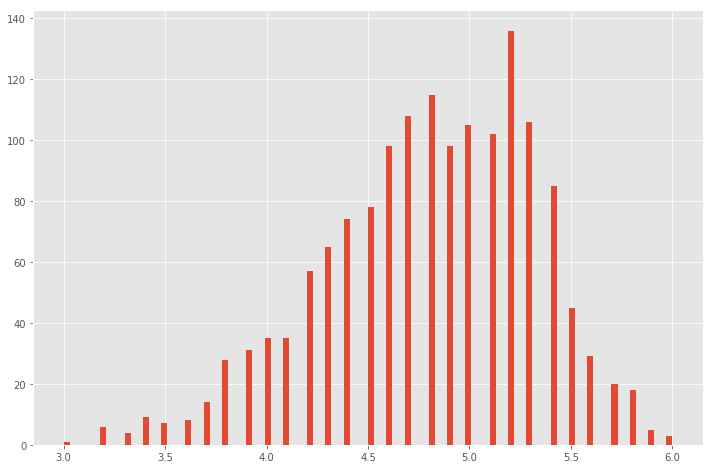

In [821]:
# 次に、"sweet"という列の分布を見てみる
plt.figure(figsize=(12, 8))
plt.hist(df['sweet'], bins=100)
plt.show()

In [822]:
df.drop(['sweet','sweet_category'], axis=1, inplace=True) #対象の列を削除

In [823]:
# 多クラスSVMのOneVsRestClassifier
from sklearn.multiclass import OneVsRestClassifier

In [826]:
# (1)カテゴリー変数をダミー変数にする
#df = pd.get_dummies(df, ['month', 'quarter', 'half'])

# (2)カテゴリー変数をダミー変数にする
df = pd.get_dummies(df, ['month'])

# (3)カテゴリー変数をダミー変数にする
#df.drop(['month'], axis=1, inplace=True)
#df = pd.get_dummies(df, ['quarter'])

# (4)カテゴリー変数をダミー変数にする
#df.drop(['month'], axis=1, inplace=True)
#df = pd.get_dummies(df, ['half'])



In [827]:
# ダミー変数の列を取得（いらないかも）
#columns = df.iloc[:, 5:]

# X_trainからダミー変数を削除（いらない）
# X_train.drop(X_train.iloc[:, 5:], axis=1, inplace=True)

In [828]:
# 訓練データとテストデータを8：2で分割する
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1220, 9) (1220,)
(305, 9) (305,)


In [830]:
# 標準化処理（結局つかわない）
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
#y_train_std = ss.fit_transform(y_train)
X_test_std = ss.fit_transform(X_test)
#y_test_std = ss.fit_transform(y_test)

/home/yoshida/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/yoshida/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/yoshida/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/yoshida/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [831]:
# モデルを作成し、トレーニング
classifier = OneVsRestClassifier(SVC())

C_params = np.logspace(-4, 4, 5)
gamma_params = np.logspace(-4, 4, 5)

parameters = {
    'estimator__C': C_params,
    'estimator__gamma': gamma_params
}

model_tuning = GridSearchCV(
    estimator = classifier,
    param_grid = parameters,
    n_jobs = -1,
    verbose = 3
)

model_tuning.fit(X_train, y_train)

/home/yoshida/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  68 out of  75 | elapsed:    4.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    9.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          n_jobs=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'estimator__C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]), 'estimator__gamma': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [832]:
# 精度を出力
print("Train accuracy :", model_tuning.score(X_train, y_train))
print("Test accuracy :", model_tuning.score(X_test, y_test))

Train accuracy : 0.7204918032786886
Test accuracy : 0.5901639344262295
